In [22]:
# FS plots of stripe imagery and its Fourier Transforms, 2015-10-20.

%matplotlib notebook

import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg

from scipy import misc
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq

# This is confusing but for some reason these methods are in NumPy only, not SciPy
from numpy.fft import rfft2, irfft2, rfftfreq

from scipy.io import wavfile

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


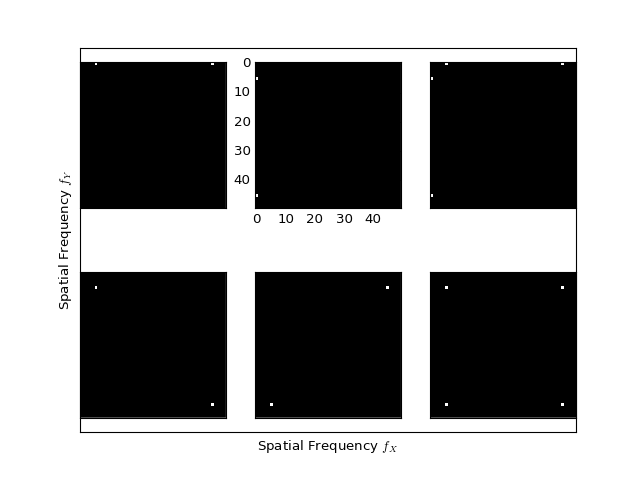

[]

In [23]:
# This looks like a horrible way of setting up the plots.
# Probably should have used .subplots() and related methods 
# to avoid duplication of the axis control instructions ...
# e.g. figSPFRsparr, SPFRsparr = plt.subplots(2, 3, sharex=True, sharey=True)

fig_sp = plt.figure()
fig_spfr = plt.figure()

ax_sp = fig_sp.add_subplot(1,1,1)    
ax_spfr = fig_spfr.add_subplot(1,1,1)

ax_sp.axes.get_xaxis().set_ticks([])
ax_sp.axes.get_yaxis().set_ticks([])

ax_sp.set_xlabel('Spatial dimension $X$')
ax_sp.set_ylabel('Spatial dimension $Y$')

ax_spfr.axes.get_xaxis().set_ticks([])
ax_spfr.axes.get_yaxis().set_ticks([])

ax_spfr.set_xlabel('Spatial Frequency $f_X$')
ax_spfr.set_ylabel('Spatial Frequency $f_Y$')

ax1 = fig_spfr.add_subplot(2,3,1)
ax2 = fig_spfr.add_subplot(2,3,2)
ax3 = fig_spfr.add_subplot(2,3,3)

ax21 = fig_spfr.add_subplot(2,3,4)
ax22 = fig_spfr.add_subplot(2,3,5)
ax23 = fig_spfr.add_subplot(2,3,6)

ax1.axes.get_xaxis().set_ticks([])
ax1.axes.get_yaxis().set_ticks([])
ax3.axes.get_xaxis().set_ticks([])
ax3.axes.get_yaxis().set_ticks([])
ax21.axes.get_xaxis().set_ticks([])
ax21.axes.get_yaxis().set_ticks([])
ax22.axes.get_xaxis().set_ticks([])
ax22.axes.get_yaxis().set_ticks([])
ax23.axes.get_xaxis().set_ticks([])
ax23.axes.get_yaxis().set_ticks([])

ax4 = fig_sp.add_subplot(2,3,1)
ax5 = fig_sp.add_subplot(2,3,2)
ax6 = fig_sp.add_subplot(2,3,3)
ax24 = fig_sp.add_subplot(2,3,4)
ax25 = fig_sp.add_subplot(2,3,5)
ax26 = fig_sp.add_subplot(2,3,6)

ax4.axes.get_xaxis().set_ticks([])
ax4.axes.get_yaxis().set_ticks([])
ax6.axes.get_xaxis().set_ticks([])
ax6.axes.get_yaxis().set_ticks([])
ax24.axes.get_xaxis().set_ticks([])
ax24.axes.get_yaxis().set_ticks([])
ax25.axes.get_xaxis().set_ticks([])
ax25.axes.get_yaxis().set_ticks([])
ax26.axes.get_xaxis().set_ticks([])
ax26.axes.get_yaxis().set_ticks([])


In [24]:
# Make stripe images the easy way by cheating! Take the inverse Fourier Transform of a single point 
# at various coordinates in the Spatial Frequency domain.

# An complex array for the frequency domain with N frequencies in each dimension.
N = 50 
xf = np.zeros((N,N),dtype=complex)


# Set any one of the frequencies to be non-zero.
xf[0, 5] = 1 + 0j # For a cosine which starts high 
#or use 0 + 1j to for a sine which starts low

xf[0, N-5] = 1 - 0j # The negative freq associated with the above.
# Not needed here because we want real numbers-only imagery. 
# Just doing it to be consistent with actual FT data

# Look at a picture of the point in the frequency domain
ax1.imshow(np.abs(xf), cmap=cm.Greys_r, interpolation="none")
# Convert from frequency domain to spatial domain
Z = ifft2(xf)

# print(Z) # Just checking that the imaginary parts are all zero 
# since there should be no sine component in the image.

# Look at the real part only. 
ax4.imshow(np.real(Z), cmap=cm.Greys_r, interpolation="none")

In [25]:
xf = np.zeros((N, N),dtype=complex)

xf[5, 0] = 1 + 0j
xf[N-5,0] = 1 + 0j

Z = ifft2(xf)
ax2.imshow(np.abs(xf), cmap=cm.Greys_r, interpolation="none")
ax5.imshow(np.real(Z), cmap=cm.Greys_r, interpolation="none")

In [26]:
xf = np.zeros((N,N),dtype=complex)

xf[0, 5] = 1 + 0j
xf[0, N-5] = 1 - 0j

xf[5, 0] = 1 + 0j
xf[N-5, 0] = 1 - 0j

Z = ifft2(xf)
ax3.imshow(np.abs(xf), cmap=cm.Greys_r, interpolation="none")
ax6.imshow(np.real(Z), cmap=cm.Greys_r, interpolation="none")

In [27]:
xf = np.zeros((N, N),dtype=complex)

xf[5, 5] = 1 + 0j
xf[N-5, N-5] = 1 - 0j

Z = ifft2(xf)
ax21.imshow(np.abs(xf), cmap=cm.Greys_r, interpolation="none")
ax24.imshow(np.real(Z), cmap=cm.Greys_r, interpolation="none")

In [28]:
xf = np.zeros((N, N),dtype=complex)

xf[N-5, 5] = 1 + 0j
xf[5, N-5] = 1 - 0j

Z = ifft2(xf)
ax22.imshow(np.abs(xf), cmap=cm.Greys_r, interpolation="none")
ax25.imshow(np.real(Z), cmap=cm.Greys_r, interpolation="none")

In [29]:
xf = np.zeros((N, N),dtype=complex)

xf[5, 5] = 1 + 0j
xf[N-5, N-5] = 1 - 0j

xf[N-5, 5] = 1 + 0j
xf[5, N-5] = 1 - 0j

Z = ifft2(xf)

ax23.imshow(np.abs(xf), cmap=cm.Greys_r, interpolation="none")
ax26.imshow(np.real(Z), cmap=cm.Greys_r, interpolation="none")

In [30]:
#fig_sp.savefig('Spatial-dimensions-stripes.png', dpi=600)
#fig_spfr.savefig('Spatial-frequencies-stripes.png', dpi=600)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


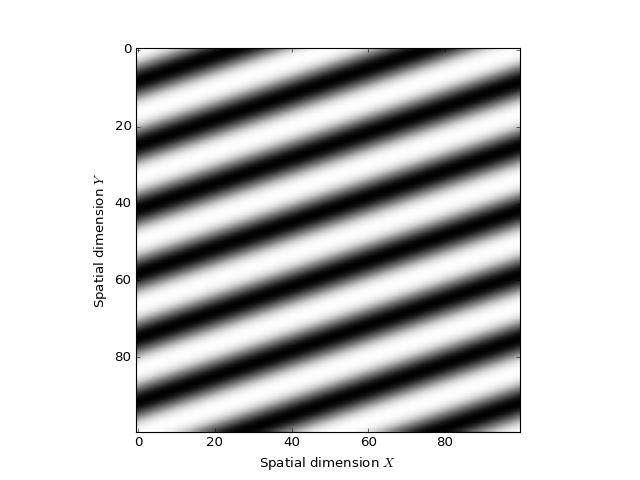

<IPython.core.display.Javascript object>


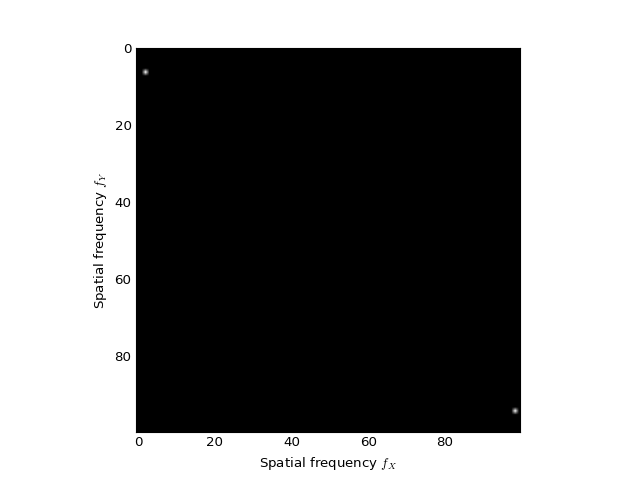

In [31]:
# Make an animation showing different sinusiod orientations specified by spatial frequencies along the X and Y axes.

# X and Y axes are switched! Don't know why and don't have time to work out/why!

spfrplot = plt.figure()
axspfr = spfrplot.add_subplot(1,1,1)

axspfr.set_xlabel('Spatial frequency $f_X$')
axspfr.set_ylabel('Spatial frequency $f_Y$')

spplot = plt.figure()
axsp = spplot.add_subplot(1,1,1)

axsp.set_xlabel('Spatial dimension $X$')
axsp.set_ylabel('Spatial dimension $Y$')

spfr2plot = plt.figure()
axspfr2 = spfr2plot.add_subplot(1,1,1)

axspfr2.set_xlabel('Spatial frequency $f_X$')
axspfr2.set_ylabel('Spatial frequency $f_Y$')

# For N possible frequencies in each dimension of frequency domain.

N = 100  # Using far more then necessary to ensure resulting image has enough pixels.

# Loop through the positive frequencies-only quadrant (top left) and give only one a non-zero value at each iteration
# then put its complex-conjugates into the other quadrants

# plt.ion()

for fX in range(6,7): # Range excludes the last number ... like < instead of <=
    for fY in range(2,3):
    
        xf = np.zeros((N,N),dtype=complex) # Create a new empty array each time. Inefficient, I know, but easy to do!

        xf[fX, fY] = 1 + 0j # Don'tp bother setting up conjugates, just view real part of image instead.
        
        # Look at a picture of the point in the frequency domain
        axspfr.imshow(np.abs(xf), cmap=cm.Greys_r)

        # Convert from frequency domain to spatial domain
        Z = ifft2(xf)

        # Look at the real part only. 
        axsp.imshow(np.real(Z), cmap=cm.Greys_r)
        
        # Convert spatial to frequency domain to double-check original
        
        xf2 = fft2(np.real(Z))
        axspfr2.imshow(np.abs(xf2), cmap=cm.Greys_r)

#       while True: 
#           if plt.waitforbuttonpress(): # Can't get this to work so animation runs too fast to see :-(
#                break

In [32]:
#spplot.savefig('Spatial-dimensions-stripes-2-6.png', dpi=600)
spfr2plot.savefig('Spatial-frequencies-stripes-2-6.png', dpi=600)

(768, 655)


<IPython.core.display.Javascript object>


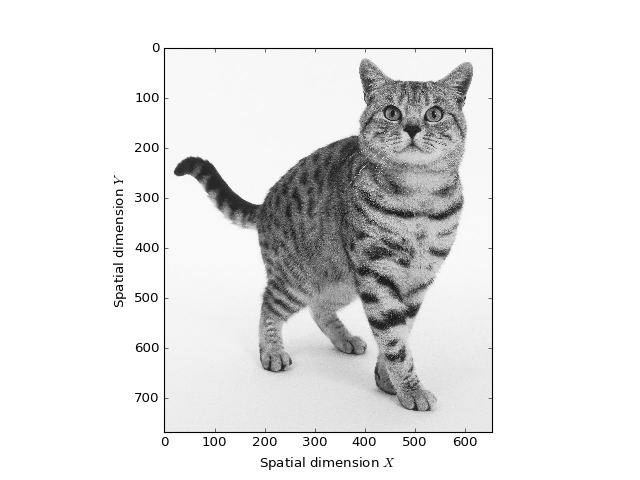

In [33]:
img = mpimg.imread('StripedCat.png')
print(img.shape)

spplot = plt.figure()
axsp = spplot.add_subplot(1,1,1)
axsp.imshow(img, cmap=cm.Greys_r, interpolation="none")

axsp.set_xlabel('Spatial dimension $X$')
axsp.set_ylabel('Spatial dimension $Y$')

# spplot.savefig('StripedCat-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)


<IPython.core.display.Javascript object>


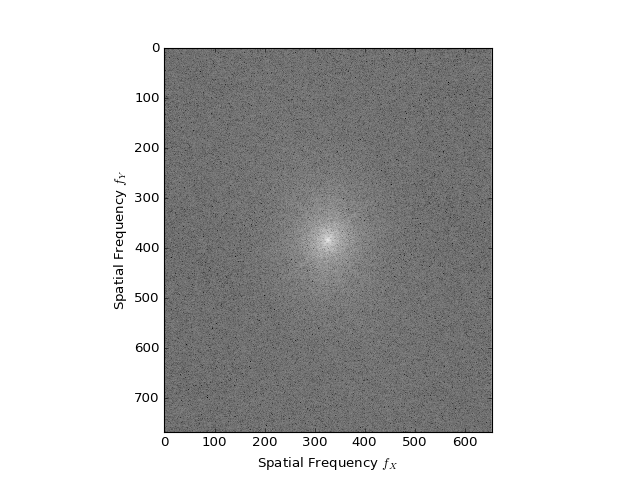

In [34]:
# Get the FT 

spfr = fft2(img)

frequencies_fft_rows = fftfreq(img.shape[0],1/img.shape[0])                                 
frequencies_fft_cols = fftfreq(img.shape[1],1/img.shape[1])

#print(frequencies_fft_rows) # These look correct
#print(frequencies_fft_cols)

spfrplot = plt.figure()
axspfr = spfrplot.add_subplot(1,1,1)

axspfr.set_xlabel('Spatial Frequency $f_X$')
axspfr.set_ylabel('Spatial Frequency $f_Y$')

# axspfr.set_xticks(frequencies_fft_rows) # Can't get ticks working. Giving up!
# axspfr.set_yticks(frequencies_fft_cols)

ps_spfr = np.abs(fftshift(spfr)**2) # Get the power spectrum

# log scale is used to scale down bigger number disproportionately to smaller ones
axspfr.imshow(np.log(np.abs(ps_spfr)), cmap=cm.Greys_r, interpolation="none") 

#spfrplot.savefig('StripedCatFFT-100PC-FFTSHIFT-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)


<IPython.core.display.Javascript object>


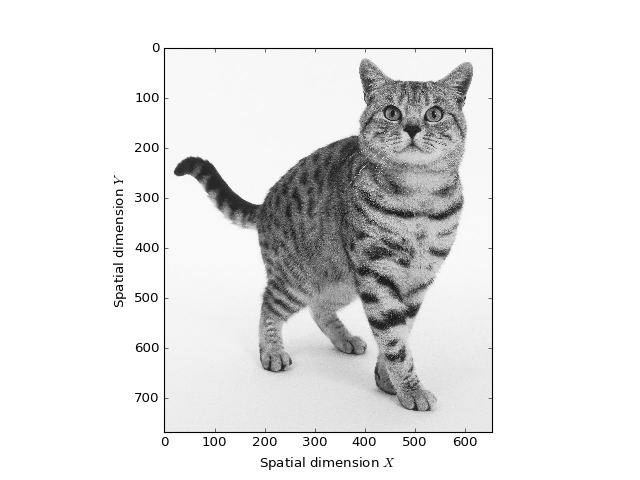

In [35]:
iimg = ifft2(spfr)

ispplot = plt.figure()
axisp = ispplot.add_subplot(1,1,1)

axisp.imshow(np.abs(iimg), cmap=cm.Greys_r, interpolation="none")

axisp.set_xlabel('Spatial dimension $X$')
axisp.set_ylabel('Spatial dimension $Y$')

# ispplot.savefig('StripedCatIFFT-100PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)

<IPython.core.display.Javascript object>


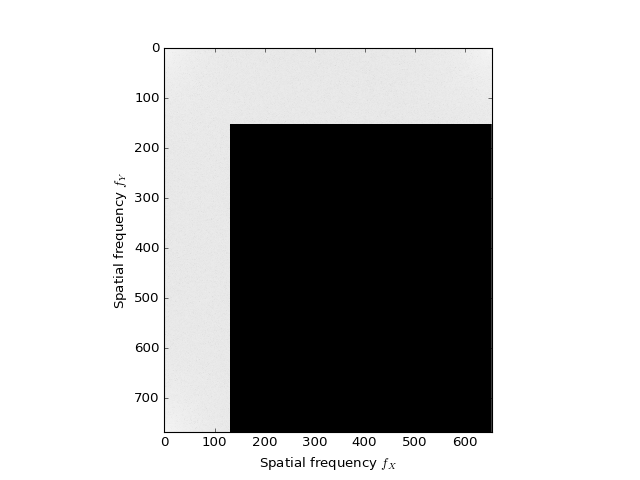

In [36]:
imrows, imcols = img.shape

spfr = fft2(img)

spfr[imrows//5:,imcols//5:] = \
    np.ones((imrows-imrows//5,imcols-imcols//5)) * 1E-20

spfrplot = plt.figure()
axspfr = spfrplot.add_subplot(1,1,1)

ps_spfr = np.abs(spfr)**2

axspfr.imshow(np.log10(ps_spfr), cmap=cm.Greys_r, interpolation="none")

axspfr.set_xlabel('Spatial frequency $f_X$')
axspfr.set_ylabel('Spatial frequency $f_Y$')

# spfrplot.savefig('StripedCatFFT-32PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)


<IPython.core.display.Javascript object>


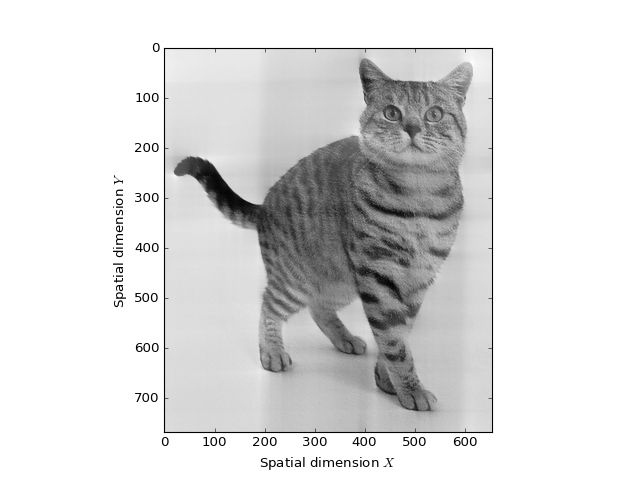

In [37]:
iimg = ifft2(spfr)

ispplot = plt.figure()
axisp = ispplot.add_subplot(1,1,1)

axisp.imshow(np.real(iimg), cmap=cm.Greys_r, interpolation="none")

axisp.set_xlabel('Spatial dimension $X$')
axisp.set_ylabel('Spatial dimension $Y$')

# ispplot.savefig('StripedCatIFFT-32PC-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)

(768, 655)
(50, 50)


<IPython.core.display.Javascript object>


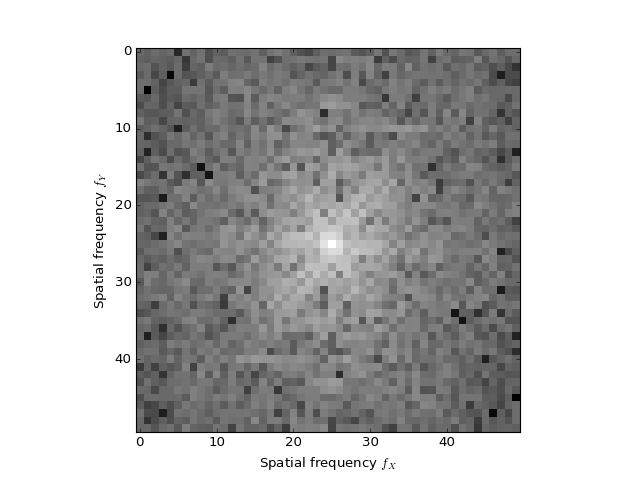

<IPython.core.display.Javascript object>


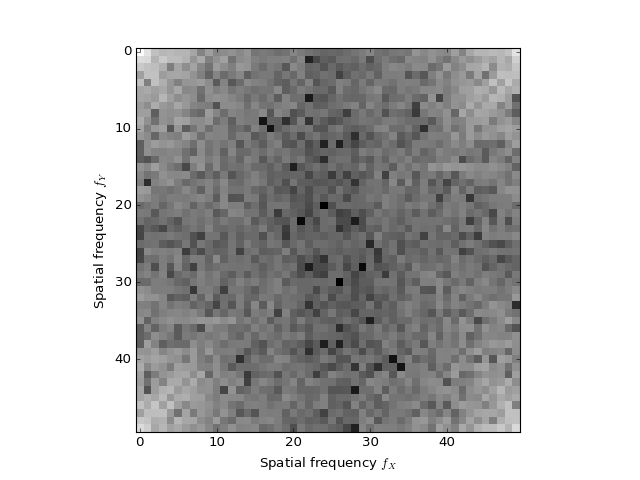

In [38]:
# Make a new image comprising lower spatial frequencies only and that has lower 
# spatial resolution (i.e. fewer pixels) which should be achieved by applying the
# inverse Fourier Transform to a smaller sized frequency space.

NewHalfSideLength = 25

imrows, imcols = img.shape

mid_rows = imrows//2 
mid_cols = imcols//2

spfr = fft2(img)
print(spfr.shape)

spfr_shift = fftshift(spfr)
smaller_spfr_shift = spfr_shift[mid_rows-NewHalfSideLength:mid_rows+NewHalfSideLength, 
                                        mid_cols-NewHalfSideLength:mid_cols+NewHalfSideLength]
print(smaller_spfr_shift.shape)

ps_smaller_spfr_shift = np.abs(smaller_spfr_shift)**2

smaller_spfr = ifftshift(smaller_spfr_shift)
ps_smaller_spfr = np.abs(smaller_spfr)**2


spfrplot = plt.figure()
axspfr = spfrplot.add_subplot(1,1,1)
axspfr.set_xlabel('Spatial frequency $f_X$')
axspfr.set_ylabel('Spatial frequency $f_Y$')

axspfr.imshow(np.log(ps_smaller_spfr_shift), cmap=cm.Greys_r, interpolation="none")

spfrplot2 = plt.figure()
axspfr2 = spfrplot2.add_subplot(1,1,1)
axspfr2.set_xlabel('Spatial frequency $f_X$')
axspfr2.set_ylabel('Spatial frequency $f_Y$')

axspfr2.imshow(np.log(ps_smaller_spfr), cmap=cm.Greys_r,interpolation="none")

In [39]:
#spfrplot.savefig('StripedCatFFT-50x50-Centered-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)
#spfrplot2.savefig('StripedCatFFT-50x50-Uncentered-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)

<IPython.core.display.Javascript object>


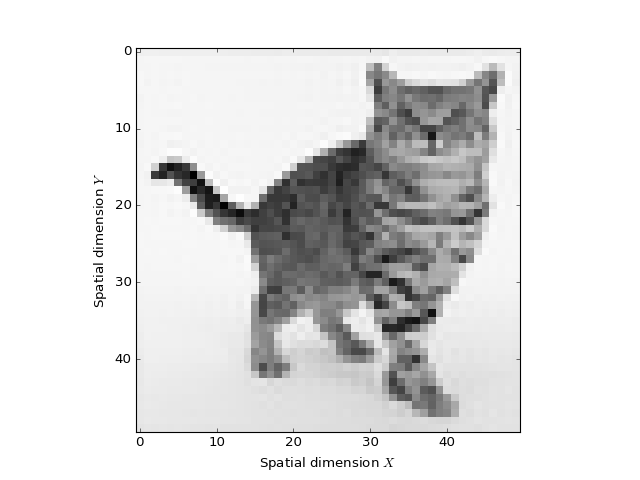

In [40]:
iimg = ifft2(smaller_spfr)

ispplot = plt.figure()
axisp2 = ispplot.add_subplot(1,1,1)

axisp2.imshow(np.abs(iimg), cmap=cm.Greys_r, interpolation="none")

axisp2.set_xlabel('Spatial dimension $X$')
axisp2.set_ylabel('Spatial dimension $Y$')

In [41]:
#ispplot.savefig('StripedCatIFFT-50x50-Plot.png', bbox_inches='tight', pad_inches=0, dpi=600)

<IPython.core.display.Javascript object>


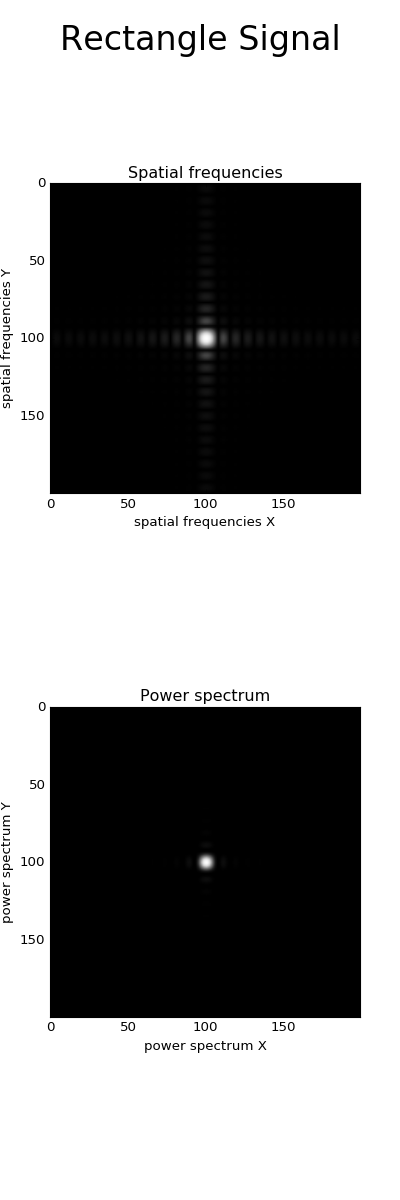

<IPython.core.display.Javascript object>


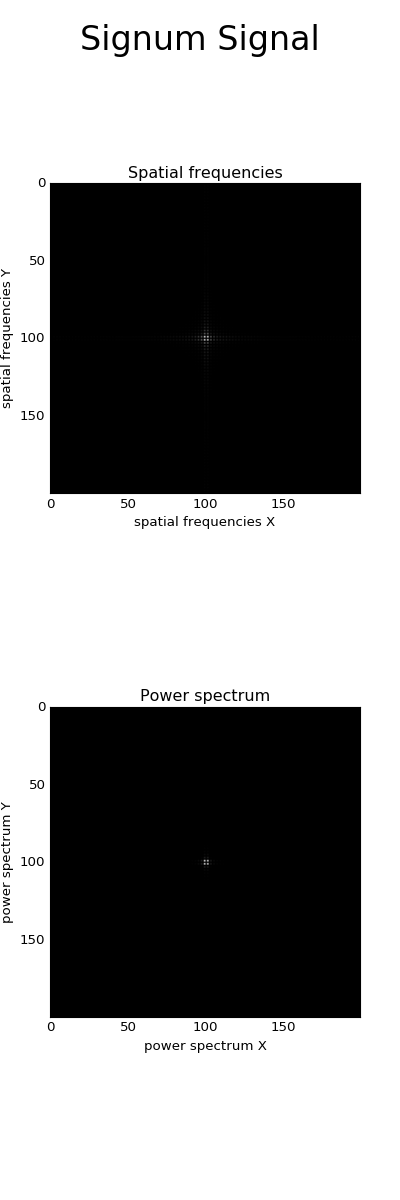

<IPython.core.display.Javascript object>


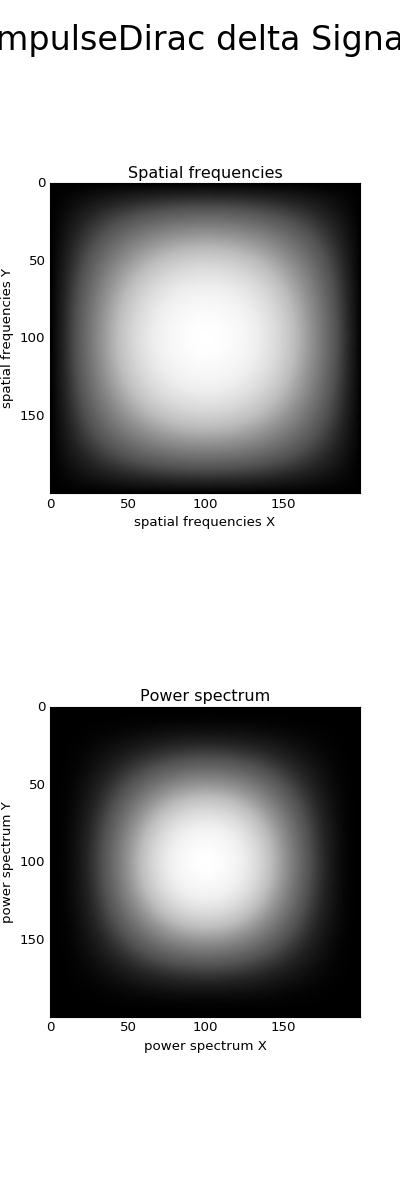

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


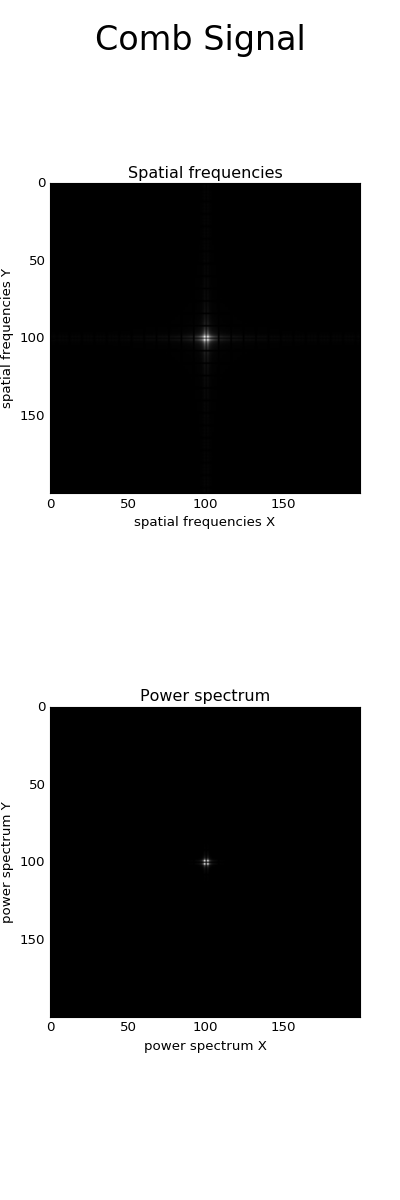

In [53]:
#For plotting the functions, since they are seperable in rect coords, if I understand correctly I need to 
#calulate 2 1-D vectors and produce the image as their "outer product".

#I am copying some definitions from my answer for the previous lab
def mapp(function,time_array):
    i=0
    result = [0.0]*len(time_array)
    for t in time_array:
        result[i]=function(t)
        i=i+1
    return result
 
#now the signal functions as defined mathematicaly    
def rect(t):
    if np.abs(t)>0.5:
        return 0
    elif np.abs(t)==0.5:
         return 0.5
    elif np.abs(t)<0.5:
        return 1
        
def sgn(t):
    if t>0:
        return 1
    elif t==0:
        return 0
    elif t<0:
        return -1
    
def imp(t):
    if t==0:
        return 1
    elif t!=0:
        return 0
    
def sinc(t):
    if t!=0:
        return np.sin(np.pi*t)/(np.pi*t)
    else:
        return np.sin(np.pi*0.01)/(np.pi*0.01)

def tri(t):
    if np.abs(t)<1:
        return 1-np.abs(t)
    elif np.abs(t)>=1:
        return 0
def comb(t):
    kmax=10
    kmin=-10
    sum=0
    for k in range(kmin,kmax):
        sum=sum+sgn(t-k)
    return sum


#Now I will create 2 arrays. If I want to create a square image then I need to calculate only one of them and take the
#outer product with itself. Based on this idea, I will calculate the biggest and use a frame limit for the smaller
#to save some computational time.

def power_spec2(signal1D):
    signal2D =np.empty([len(signal1D),len(signal1D)])
    for x in range(0,len(signal1D)):
        for y in range(0,len(signal1D)):
            signal2D[x][y] =signal1D[x]*signal1D[y]
    #fft = fft2(signal2D)
    fft=np.fft.fftshift(fft2(signal2D),axes=(0,1))
    power = np.abs(fft)**2
    return signal2D,fft,power
            

#creating the space sampling
space_to_plot=4
space_density = 25 #similar to sampling_rate
space_array =np.append(np.linspace(-space_to_plot,0,space_density*space_to_plot), np.linspace(0,space_to_plot,space_density*space_to_plot))


#Rectangle signal
rect_array = mapp(rect,space_array)
rect_matrix,rect_fft,rect_power = power_spec2(rect_array)

#Signum signal
sign_array = mapp(sgn,space_array)
sign_matrix,sign_fft,sign_power = power_spec2(sign_array)

#Impulse/Dirac delta signal
imp_array = mapp(imp,space_array)
imp_matrix,imp_fft,imp_power = power_spec2(imp_array)

#Triangle signal
tri_array = mapp(tri,space_array)
tri_matrix,tri_fft,tri_power = power_spec2(tri_array)

#Comb signal
comb_array = mapp(comb,space_array)
comb_matrix,comb_fft,comb_power = power_spec2(comb_array)


#plot
def plot(signal,fft,power,freq,space,name,save):
    #I plot only the positive frequencies for the fft2 (real parts)
    fig= plt.figure(figsize=(5,15)) 
    
    fig.suptitle(name+" Signal",fontsize=30)
    
#    signal_sfig = fig.add_subplot(3,1,1)
#    signal_sfig.set_title("Signal")
#    signal_sfig.set_xlabel("space X")
#    signal_sfig.set_xticklabels(np.around(space, decimals=2)[::len(space)//6])
#    signal_sfig.set_yticklabels(np.around(space, decimals=2)[::len(space)//6])
#    signal_sfig.set_ylabel("space Y")
#    signal_sfig.imshow(np.fft.fftshift(signal,axes=(0,1)),cmap=cm.Greys_r)
    
    fft_sfig = fig.add_subplot(2,1,1)
    fft_sfig.set_title("Spatial frequencies")
    fft_sfig.set_xlabel("spatial frequencies X")
    fft_sfig.set_ylabel("spatial frequencies Y")
   # fft_sfig.set_xticklabels(freq[::len(freq)//6])
   # fft_sfig.set_yticklabels(freq[::len(freq)//6])
    fft_sfig.imshow(fft,cmap=cm.Greys_r)
    
    power_sfig = fig.add_subplot(2,1,2)
    power_sfig.set_title("Power spectrum")
    power_sfig.set_xlabel("power spectrum X")
    power_sfig.set_ylabel("power spectrum Y")
   # power_sfig.set_xticklabels(freq[::len(freq)//6])
   # power_sfig.set_yticklabels(freq[::len(freq)//6])
    power_sfig.imshow(power,cmap=cm.Greys_r)
    if save==True:
        fig.savefig(name+'.png', dpi=600)
    
save=True   
#Rectangle signal
plot(rect_matrix,np.abs(rect_fft),rect_power,rfftfreq(len(rect_array),1/space_density),space_array,"Rectangle",save)

#Signum signal
plot(sign_matrix,np.abs(sign_fft),sign_power,rfftfreq(len(sign_array),1/space_density),space_array,"Signum",save)

#Impulse/Dirac delta signal
plot(imp_matrix,np.abs(imp_fft),imp_power,rfftfreq(len(imp_array),1/space_density),space_array,"ImpulseDirac delta",save)

#Triangle signal
plot(tri_matrix,np.abs(tri_fft),tri_power,rfftfreq(len(tri_array),1/space_density),space_array,"Triangle",save)

#Comb signal
plot(comb_matrix,np.abs(comb_fft),comb_power,rfftfreq(len(comb_array),1/space_density),space_array,"Comb",save)